TODO : add explanatory plots

TODO /!\ solve the equation in 1. or 2. ??? 

# 1. Bio-mechanical model of the eye

Naturally any movement of the eye can mathematically be represented by the following differential equation, which represents a linear model of the eye : 
  
$$
\dfrac{d\dot{x}(t)}{dt} = -\frac{1}{\tau}\cdot\dot{x}(t)+u(t)
$$

where $\tau$ is a constant of the eye, with $\left[\tau\right] = s$

If we take some examples to illustrate the equation we obtain the plots below : ... 

In [1]:
# TODO: add plots

# 2. Symmetrical bang-bang : analytical solution

  
## 2.1. Reach of the target

Let $t$ be the time variable, $T$ the time (in $s$) when the target is pointed, $x(t)$ and $\dot{x}(t)$ respectively the position and the velocity at time $t$, $x_T$ the position to reach, $\rho \in \left [0 ,1\right]$.  
$x(t=0) = 0$ and $\dot{x}(t=0) = 0$  
  
$\newcommand{\intervalle}[2]{\left[#1\mathclose{}\mathpunct{};#2\right]}
\newcommand{\intervallefo}[2]{\left[#1\mathclose{}\mathpunct{};#2\right[}
\newcommand{\intervalleof}[2]{\left]#1\mathclose{}\mathpunct{};#2\right]}
\newcommand{\intervalleoo}[2]{\left]#1\mathclose{}\mathpunct{};#2\right[}$  
$\forall t \in \intervalle{0}{\rho\cdot T} : u(t) = U_+$  
$\forall t \in \intervalleof{\rho\cdot T}{T} : u(t) = U_-$  
$\forall t \in \intervalleoo{T}{+\infty} : u(t) = U_{\infty}$  
  
Formally, 
$$
u(t) = \mathbb 1_{\intervalle{0}{\rho\cdot T}} \cdot U_+ + \mathbb 1_{\intervalleof{\rho\cdot T}{T}} \cdot U_- + \mathbb 1_{\intervalleoo{T}{+\infty}} \cdot U_\infty
$$

where $\mathbb 1_{\mathcal{I}}$ is the [indicator function](https://en.wiktionary.org/wiki/indicator_function#English) of the interval $\mathcal{I}$
  
We will solve the following differential equation, which represents a linear model of the eye, on the previous intervals:  
  
$$
\dfrac{d\dot{x}(t)}{dt} = -\frac{1}{\tau}\cdot\dot{x}(t)+u(t)
$$

where $\tau$ is a constant of the eye, with $\left[\tau\right] = s$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from HarrisWolpertandPursuit import BangBang
BB = BangBang()

On $\intervalle{0}{\rho\cdot T}: \dfrac{d\dot{x}(t)}{dt} = -\dfrac{1}{\tau}\cdot\dot{x}(t)+U_+$  
  
We find:  $\dot{x}(t) = U_+\cdot\tau\left (1-e^{- \frac{t}{\tau}} \right )$ and so : $x(t) = U_+\cdot\tau\left [t-\tau\left(1-e^{- \frac{t}{\tau}} \right )\right]$

On $\intervalleof{\rho\cdot T}{T}: \dfrac{d\dot{x}(t)}{dt} = -\dfrac{1}{\tau}\cdot\dot{x}(t)+U_-$  
  
We find:  $\dot{x}(t) = U_-\cdot\tau\left (1-e^{\frac{T-t}{\tau}} \right )$ and so : $x(t) = x_T - U_-\cdot\tau\left [T-t+\tau\left(1-e^{\frac{T-t}{\tau}} \right )\right]$
 

On $\intervalleoo{T}{+\infty}: \dfrac{d\dot{x}(t)}{dt} = -\dfrac{1}{\tau}\cdot\dot{x}(t)+U_{\infty}$  
  
We find:  $U_{\infty} = 0$ since $\forall t \in \intervalleoo{T}{+\infty}, \dot{x}(t) = 0$ (and $\ddot{x}(t) = 0$) and so : $x(t) = x_T$
 

Then, we use the continuity of the velocity at time $\rho\cdot T$ to find relations between $U_+$, $U_-$ and $\rho$.  
  
We assume that $U_+ = U_{MAX}$ and $U_- = - U_{MAX}$.  
  
We deduce : $\dot{x}(\rho T) = U_{MAX}\cdot\tau\left(1-e^{- \frac{\rho T}{\tau}} \right ) = -U_{MAX}\cdot\tau\left(1-e^{\frac{\left(1-\rho\right)T}{\tau}} \right )$.  
  
Finally: $\rho = -\dfrac{\tau}{T}\ln \left(\dfrac{2}{1+e^{\frac{T}{\tau}}}\right)$
($= \dfrac{\tau}{T}\log \left(\dfrac{1+e^{\frac{T}{\tau}}{2}}\right)$)

The continuity of the position at time $\rho\cdot T $ enables to find $U_{MAX}: U_{MAX} = \dfrac{1}{\tau}\dfrac{1}{\left (2\rho-1\right)T-\tau\left(2-e^{-\frac{\rho T}{\tau}} - e^{\frac{\left(1-\rho \right)T}{\tau}}\right)} \cdot  x_T$

Note: since the relation is linear, trajectories are linear in 2D for any target's position.

x = np.concatenate((Umax*tau*(time[0:rhoT]-tau*(1-np.exp(-1/tau*time[0:rhoT]))),
                    xT+Umax*tau*(t_T-time[rhoT:T]+tau*(1-np.exp(1/tau*(t_T-time[rhoT:T])))),
                    xT*np.ones(R+1)))
v = np.concatenate((Umax*tau*(1-np.exp(-1/tau*time[0:rhoT])),
                    -Umax*tau*(1-np.exp(1/tau*(t_T-time[rhoT:T]))),
                    np.zeros(R+1)))
u = np.concatenate((Umax*np.ones(rhoT),
                    -Umax*np.ones(T-rhoT),
                    np.zeros(R+1)))

In [3]:
# show the array of the control signal for the asymmetrical bang-bang
BB.command_u()

array([ 23648.46184793,  23648.46184793,  23648.46184793,  23648.46184793,
        23648.46184793,  23648.46184793,  23648.46184793,  23648.46184793,
        23648.46184793,  23648.46184793,  23648.46184793,  23648.46184793,
        23648.46184793,  23648.46184793,  23648.46184793,  23648.46184793,
        23648.46184793,  23648.46184793,  23648.46184793,  23648.46184793,
        23648.46184793,  23648.46184793,  23648.46184793,  23648.46184793,
        23648.46184793,  23648.46184793,  23648.46184793,  23648.46184793,
        23648.46184793,  23648.46184793,  23648.46184793,  23648.46184793,
        23648.46184793,  23648.46184793,  23648.46184793,  23648.46184793,
        23648.46184793,  23648.46184793,  23648.46184793,  23648.46184793,
        23648.46184793, -23648.46184793, -23648.46184793, -23648.46184793,
       -23648.46184793, -23648.46184793, -23648.46184793, -23648.46184793,
       -23648.46184793, -23648.46184793,      0.        ,      0.        ,
            0.        ,  

Text(0,0.5,'Control signal $u$')

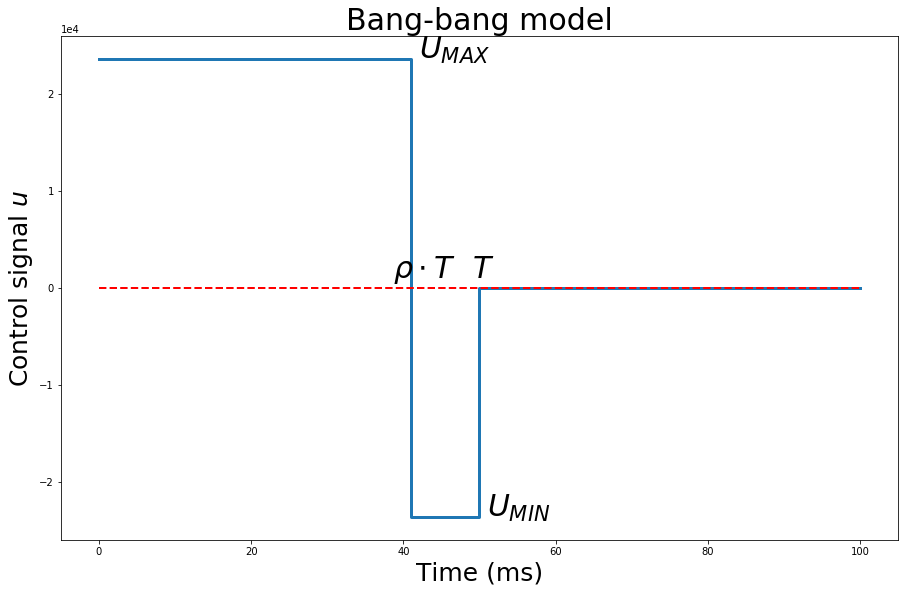

In [4]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))

ax.step(BB.time_ms(), BB.command_u(), '-', where = 'post', lw = 3)
ax.plot([0,(BB.t_T+BB.t_R)*1000],[0,0], 'r--', lw = 2)
plt.text(38.7, 1000, r'$\rho \cdot T$', fontsize = 30)
plt.text(49, 1000, r'$T$', fontsize = 30)
plt.text(42, BB.Umax(), r'$U_{MAX}$', fontsize = 30)
plt.text(51, -BB.Umax(), r'$U_{MIN}$', fontsize = 30)

ax.ticklabel_format(axis='y', style='scientific', scilimits=(-3, 3))
#ax.set_xlim(0, 150)
ax.set_title('Bang-bang model', fontsize = 30)
ax.set_xlabel('Time (ms)', fontsize=25)
ax.set_ylabel(r'Control signal $u$', fontsize=25)


(-0.5, 10.5)

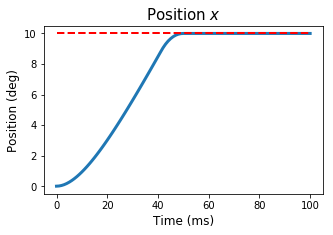

In [5]:
fig_width = 5
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))

ax.plot(BB.time_ms(), BB.theory_x(), '-',lw = 3)
ax.plot([0,(BB.t_T+BB.t_R)*1000],[BB.xT,BB.xT], 'r--',lw=2)
#ax.plot(time_ms, pos+10-pos[100])
#ax.plot([start, start], [2*(p-0.5)*x2[25]-0.5,2*(p-0.5)*x2[25]+0.5], color ='r')
#ax.plot([start-2.3, start+2.3], [2*(p-0.5)*x2[25],2*(p-0.5)*x2[25]], color ='r')

ax.set_title(r'Position $x$', fontsize=15)
ax.set_xlabel('Time (ms)', fontsize=12)
ax.set_ylabel('Position (deg)', fontsize=12)
ax.ticklabel_format(axis='y', style='scientific', scilimits=(-3, 3))

ax.set_ylim(-0.5, BB.xT+0.5)


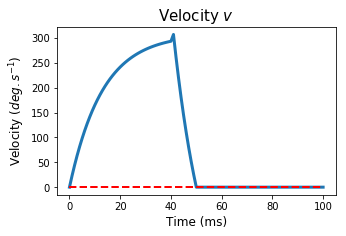

In [6]:
fig_width = 5
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))

ax.plot(BB.time_ms(), BB.theory_v(), '-',lw=3)
ax.plot([0,(BB.t_T+BB.t_R)*1000],[0,0], 'r--',lw=2)

ax.set_title(r'Velocity $v$',fontsize=15)
ax.set_xlabel('Time (ms)', fontsize=12)
ax.set_ylabel(r'Velocity ($deg.s^{-1}$)', fontsize=12)
ax.ticklabel_format(axis='y', style='scientific', scilimits=(-3, 3))


## 2.2. Reach and pursuit of the target

Here, the target is moving with the velocity $v$. We want to reach the moving target (which position at time $t$ is $x_T+v t$) and then follow it. 

Again, 
$$
u(t) = \mathbb 1_{\intervalle{0}{\rho\cdot T}} \cdot U_+ + \mathbb 1_{\intervalleof{\rho\cdot T}{T}} \cdot U_- + \mathbb 1_{\intervalleoo{T}{+\infty}} \cdot U_\infty
$$

We will solve the following differential equation, which represents a linear model of the eye, on the previous intervals:  
  
$$
\dfrac{d\dot{x}(t)}{dt} = -\frac{1}{\tau}\cdot\dot{x}(t)+u(t)
$$

On $\intervalle{0}{\rho\cdot T}: \dfrac{d\dot{x}(t)}{dt} = -\dfrac{1}{\tau}\cdot\dot{x}(t)+U_+$  
  
We find:  $\dot{x}(t) = U_+\cdot\tau\left (1-e^{- \frac{t}{\tau}} \right )$ and so : $x(t) = U_+\cdot\tau\left [t-\tau\left(1-e^{- \frac{t}{\tau}} \right )\right]$

On $\intervalleof{\rho\cdot T}{T}: \dfrac{d\dot{x}(t)}{dt} = -\dfrac{1}{\tau}\cdot\dot{x}(t)+U_-$  
  
We find:  $\dot{x}(t) = U_-\cdot\tau\left (1-e^{\frac{T-t}{\tau}} \right ) + v\cdot e^{\frac{T-t}{\tau}}$ and so : $x(t) = x_T +v\cdot T- U_-\cdot\tau\left [T-t+\tau\left(1-e^{\frac{T-t}{\tau}} \right )\right] + v\cdot \tau\left(1-e^{\frac{T-t}{\tau}} \right )$

On $\intervalleoo{T}{+\infty}: \dfrac{d\dot{x}(t)}{dt} = -\dfrac{1}{\tau}\cdot\dot{x}(t)+U_{\infty}$  
  
We find:  $U_{\infty} = \dfrac{1}{\tau}\cdot v$ since $\forall t \in \intervalleoo{T}{+\infty}, \dot{x}(t) = v$ (and $\ddot{x}(t) = 0$) and so : $x(t) = v\cdot \left ( t - T \right)+x_T+v\cdot T$

Then, we use the continuity of the velocity at time $\rho\cdot T$ to find relations between $U_+$, $U_-$ and $\rho$.  
  
We assume that $U_+ = U_{MAX}$ and $U_- = - U_{MAX}$.  
  
We deduce : $\dot{x}(\rho T) = U_{MAX}\cdot\tau\left(1-e^{- \frac{\rho T}{\tau}} \right ) = -U_{MAX}\cdot\tau\left(1-e^{\frac{\left(1-\rho\right)T}{\tau}} \right )+v\cdot e^{\frac{\left(1-\rho\right)T}{\tau}}$.  
  
Finally: $U_{MAX} = -\dfrac{\frac{1}{\tau} \cdot v \cdot e^{\frac{\left(1-\rho\right)T}{\tau}}}{2-e^{-\frac{\rho T}{\tau}}-e^{\frac{\left(1-\rho\right)T}{\tau}}}$


The continuity of the position at time $\rho \cdot T$ enables to find the value of $\rho$.
Indeed, $\rho$ is the unique solution in $\intervalle{0}{1}$ of :
$$
\left(x_T+v\cdot T \right)\left(2-e^{-\frac{\rho T}{\tau}}-e^{\frac{\left(1-\rho\right)T}{\tau}}\right) +v\cdot\tau\left(1-e^{\frac{\left(1-\rho\right)T}{\tau}}\right)\left(2-e^{-\frac{\rho T}{\tau}}-e^{\frac{\left(1-\rho\right)T}{\tau}}\right)-v\cdot e^{\frac{\left(1-\rho\right)T}{\tau}}\left [\left(2\rho-1\right)T-\tau\left(2-e^{-\frac{\rho T}{\tau}}-e^{\frac{\left(1-\rho\right)T}{\tau}} \right )\right] = 0
$$

Numerically, we find $\rho$, and then we deduce $U_{MAX}$, which enables to compute the position and the velocity of the bangbang.

(0.5, 1)

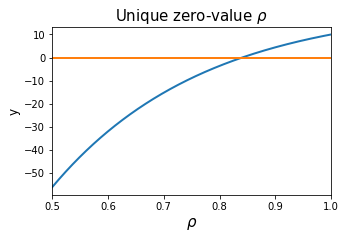

In [7]:
vrho = np.linspace(0.5, 1, 100001)
y = (BB.xT+BB.v0*BB.t_T+BB.v0*BB.tau*(1-np.exp((1-vrho)*BB.t_T/BB.tau)))*(2-np.exp(-vrho*BB.t_T/BB.tau)-np.exp((1-vrho)*BB.t_T/BB.tau))+BB.v0*np.exp((1-vrho)*BB.t_T/BB.tau)*((1-vrho)*BB.t_T+BB.tau*(1-np.exp((1-vrho)*BB.t_T/BB.tau)))-BB.v0*np.exp((1-vrho)*BB.t_T/BB.tau)*(vrho*BB.t_T-BB.tau*(1-np.exp(-vrho*BB.t_T/BB.tau)))

fig_width = 5
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
ax.plot(vrho,y,lw=2)
ax.plot([0.5,1],[0,0],lw=2)
ax.set_title(r'Unique zero-value $\rho$', fontsize=15)
ax.set_xlabel(r'$\rho$', fontsize=15)
ax.set_ylabel('y', fontsize=12)
ax.set_xlim(0.5, 1)


In [8]:
rho_pursuit = vrho[np.argmin(np.abs(y))]
Umax_pursuit = 1/BB.tau*BB.v0*np.exp((1-rho_pursuit)*BB.t_T/BB.tau)/(2-np.exp((1-rho_pursuit)*BB.t_T/BB.tau)-np.exp(-rho_pursuit*BB.t_T/BB.tau))
rhoT_pursuit = int(np.round(BB.T()*rho_pursuit))

In [9]:
Umax_pursuit

25454.350459477904

In [10]:
x_pursuit = np.concatenate((Umax_pursuit*BB.tau*(BB.time()[0:rhoT_pursuit]-BB.tau*(1-np.exp(-1/BB.tau*BB.time()[0:rhoT_pursuit]))),BB.xT+BB.v0*BB.t_T+Umax_pursuit*BB.tau*(BB.t_T-BB.time()[rhoT_pursuit:BB.T()]+BB.tau*(1-np.exp(1/BB.tau*(BB.t_T-BB.time()[rhoT_pursuit:BB.T()]))))+BB.tau*BB.v0*(1-np.exp(1/BB.tau*(BB.t_T-BB.time()[rhoT_pursuit:BB.T()]))),BB.xT+BB.v0*BB.t_T+BB.v0*(BB.time()[BB.T():(BB.T()+BB.R()+1)]-BB.t_T)))
v_pursuit = np.concatenate((Umax_pursuit*BB.tau*(1-np.exp(-1/BB.tau*BB.time()[0:rhoT_pursuit])),-Umax_pursuit*BB.tau*(1-np.exp(1/BB.tau*(BB.t_T-BB.time()[rhoT_pursuit:BB.T()])))+BB.v0*np.exp(1/BB.tau*(BB.t_T-BB.time()[rhoT_pursuit:BB.T()])),BB.v0*np.ones(BB.R()+1)))
u_pursuit = np.concatenate((Umax_pursuit*np.ones(rhoT_pursuit),-Umax_pursuit*np.ones(BB.T()-rhoT_pursuit),1/BB.tau*BB.v0*np.ones(BB.R()+1)))

In [11]:
u_pursuit

array([ 25454.35045948,  25454.35045948,  25454.35045948,  25454.35045948,
        25454.35045948,  25454.35045948,  25454.35045948,  25454.35045948,
        25454.35045948,  25454.35045948,  25454.35045948,  25454.35045948,
        25454.35045948,  25454.35045948,  25454.35045948,  25454.35045948,
        25454.35045948,  25454.35045948,  25454.35045948,  25454.35045948,
        25454.35045948,  25454.35045948,  25454.35045948,  25454.35045948,
        25454.35045948,  25454.35045948,  25454.35045948,  25454.35045948,
        25454.35045948,  25454.35045948,  25454.35045948,  25454.35045948,
        25454.35045948,  25454.35045948,  25454.35045948,  25454.35045948,
        25454.35045948,  25454.35045948,  25454.35045948,  25454.35045948,
        25454.35045948,  25454.35045948, -25454.35045948, -25454.35045948,
       -25454.35045948, -25454.35045948, -25454.35045948, -25454.35045948,
       -25454.35045948, -25454.35045948,   1538.46153846,   1538.46153846,
         1538.46153846,  

(-30000, 30000)

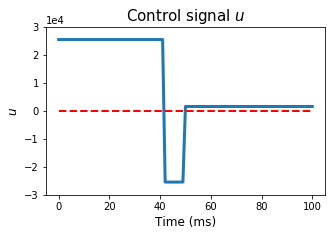

In [12]:
fig_width = 5
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))

ax.plot(BB.time_ms(), u_pursuit, '-',lw = 3)
ax.plot([0,(BB.t_T+BB.t_R)*1000],[0,0], 'r--',lw = 2)
ax.set_title(r'Control signal $u$', fontsize = 15)
ax.set_xlabel('Time (ms)', fontsize=12)
ax.set_ylabel(r'$u$', fontsize=12)
ax.ticklabel_format(axis='y', style='scientific', scilimits=(-3, 3))
ax.set_ylim(-30000, 30000)


(-0.5, 12.5)

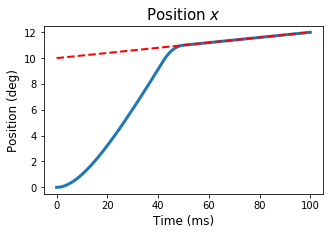

In [13]:
fig_width = 5
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))

ax.plot(BB.time_ms(), x_pursuit, '-',lw=3)
ax.plot([0,(BB.t_T+BB.t_R)*1000],[BB.xT,BB.xT+BB.v0*(BB.t_T+BB.t_R)], 'r--',lw=2)
ax.set_title(r'Position $x$', fontsize=15)
ax.set_xlabel('Time (ms)', fontsize=12)
ax.set_ylabel('Position (deg)', fontsize=12)
ax.ticklabel_format(axis='y', style='scientific', scilimits=(-3, 3))
ax.set_ylim(-0.5, BB.xT+BB.v0*(BB.t_T+BB.t_R)+0.5)


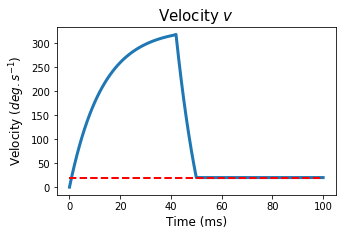

In [14]:
fig_width = 5
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))

ax.plot(BB.time_ms(), v_pursuit, '-',lw=3)
ax.plot([0,(BB.t_T+BB.t_R)*1000],[BB.v0,BB.v0], 'r--',lw=2)
ax.set_title(r'Velocity $v$',fontsize=15)
ax.set_xlabel('Time (ms)', fontsize=12)
ax.set_ylabel(r'Velocity ($deg.s^{-1}$)', fontsize=12)
ax.ticklabel_format(axis='y', style='scientific', scilimits=(-3, 3))


## 2.3. Linear prediction of the trajectory